### Assignment 3: Naive Bayes Classifier (NBC)

### Name:- Nishank Gujar
### UTA ID:- 1001861756

<b><u>References</u></b>
<b><div class="alert-success"> Green :- My Contribution </div>
<div class="alert-danger"> Red :- TBD </div>
<div class="alert-warning"> Yellow :- TBD </div>
<div class="alert-info"> Blue :- TBD </div>

<b><div class="alert-success"> Importing Libraries pandas as pd and csv to read data files. <br>
 Library matplotlib and seaborn is imported to plot count plots.</div> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
from google.colab import files
import seaborn as sns

<b><div class="alert-success"> Upload the text data file about imdb movie reviews from Kaggle.  <br>
 "https://www.kaggle.com/marklvl/sentiment-labelled-sentences-data-set"</div> 

In [2]:
uploaded = files.upload()

Saving imdb_labelled.txt to imdb_labelled (6).txt


<b><div class="alert-success"> Using library csv, we read the text file and divide the data into Review and Sentiment. <br>
 We also provide an ID number for each Review.</div> 

In [3]:
data = pd.read_csv('imdb_labelled.txt', names=['Review', 'Sentiment'], delimiter='\t')
data.insert(0, 'ID', range(0,len(data)))
data

,ID,Review,Sentiment
0,0,"A very, very, very slow-moving, aimless movie ...",0
1,1,Not sure who was more lost - the flat characte...,0
2,2,Attempting artiness with black & white and cle...,0
3,3,Very little music or anything to speak of.,0
4,4,The best scene in the movie was when Gerardo i...,1
...,...,...,...
743,743,I just got bored watching Jessice Lange take h...,0
744,744,"Unfortunately, any virtue in this film's produ...",0
745,745,"In a word, it is embarrassing.",0
746,746,Exceptionally bad!,0


<b><div class="alert-success"> The data is then cleaned by removing punctuation marks. <br>
 I have kept numbers because numbers play a vital role in deciding what the user likes or dislikes by rating it 1/10 or 10/10 respectively.</div> 

In [4]:
data = data.replace(['$', '#', '-', '!', '@', '\?', '<', '>', '\*', '\\\\' '\{', '\}', '\[', '\]', '\(', '\)', ':', ';', '"', '\. ', ', ', "' ", " '"], ' ', regex=True)
data

,ID,Review,Sentiment
0,0,A very very very slow moving aimless movie abo...,0
1,1,Not sure who was more lost the flat characte...,0
2,2,Attempting artiness with black & white and cle...,0
3,3,Very little music or anything to speak of,0
4,4,The best scene in the movie was when Gerardo i...,1
...,...,...,...
743,743,I just got bored watching Jessice Lange take h...,0
744,744,Unfortunately any virtue in this film's produc...,0
745,745,In a word it is embarrassing,0
746,746,Exceptionally bad,0


<b><div class="alert-success"> A countplot is plotted considering the Sentiment column of our data. <br>
 0 is considered a negative review while 1 is considered a positive review.</div> 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


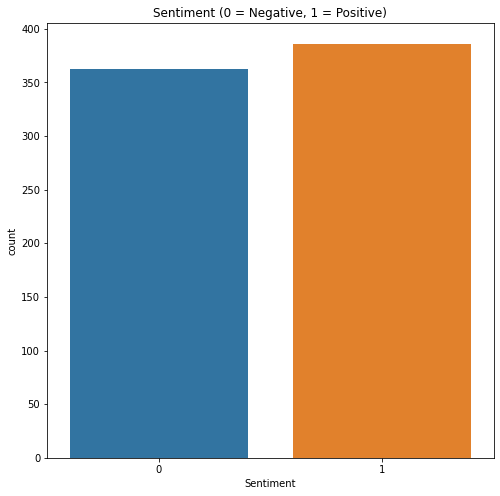

In [5]:
f, ax = plt.subplots(figsize=(8, 8))
sns.countplot(data['Sentiment']).set_title(
    'Sentiment (0 = Negative, 1 = Positive)')
plt.show()

<b><div class="alert-success"> We divide the data into train, development and test sets. <br>
 Out of 748, 598 is train data and 75 is development and test data each.</div> 

In [6]:
split_1 = int(0.8 * len(data))
split_2 = int(0.9 * len(data))
train_set = data[:split_1]
dev_set = data[split_1:split_2]
test_set = data[split_2:]
print("Size of train set: ",len(train_set))
print("Size of development set: ",len(dev_set))
print("Size of test set: ",len(test_set))

Size of train set:  598
Size of development set:  75
Size of test set:  75


<b><div class="alert-success"> A countplot is plotted considering the Sentiment column of our datasets. <br>
 i.e train set, development/dev set and test set.</div> 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


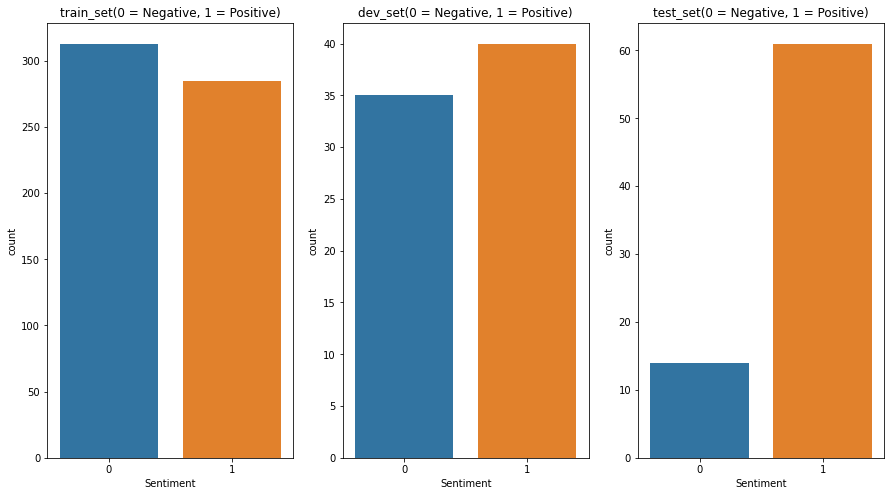

In [7]:
fig, ax = plt.subplots(1,3, figsize=(15,8))
sns.countplot(train_set['Sentiment'], ax=ax[0]).set_title("train_set(0 = Negative, 1 = Positive)")
sns.countplot(dev_set['Sentiment'], ax=ax[1]).set_title("dev_set(0 = Negative, 1 = Positive)")
sns.countplot(test_set['Sentiment'], ax=ax[2]).set_title("test_set(0 = Negative, 1 = Positive)")
fig.show()

<b><div class="alert-success"> Building a vocabulary list:- From the train set, we count the number of times a word is occured. <br>
 All words are counted in this step.</div> 

In [8]:
all_words = dict()
iD = 0  
for j in train_set.Review:
    iD = iD + 1
    for i in j.split():
        i = i.lower()
        if(i in all_words.keys()):
            all_words[i].append(iD)
        else:
            all_words[i] = list()
            all_words[i].append(iD)
for i in all_words:
    all_words[i] = len(set(all_words[i]))
all_words

{'a': 218,
 'very': 45,
 'slow': 3,
 'moving': 3,
 'aimless': 1,
 'movie': 107,
 'about': 29,
 'distressed': 1,
 'drifting': 1,
 'young': 3,
 'man': 9,
 'not': 39,
 'sure': 3,
 'who': 29,
 'was': 115,
 'more': 23,
 'lost': 3,
 'the': 291,
 'flat': 2,
 'characters': 19,
 'or': 30,
 'audience': 4,
 'nearly': 1,
 'half': 6,
 'of': 183,
 'whom': 2,
 'walked': 1,
 'out': 32,
 'attempting': 1,
 'artiness': 1,
 'with': 57,
 'black': 6,
 '&': 8,
 'white': 5,
 'and': 217,
 'clever': 3,
 'camera': 9,
 'angles': 2,
 'disappointed': 5,
 'became': 1,
 'even': 28,
 'ridiculous': 5,
 'as': 51,
 'acting': 27,
 'poor': 6,
 'plot': 21,
 'lines': 6,
 'almost': 9,
 'non': 4,
 'existent': 1,
 'little': 15,
 'music': 11,
 'anything': 4,
 'to': 139,
 'speak': 3,
 'best': 19,
 'scene': 10,
 'in': 108,
 'when': 17,
 'gerardo': 1,
 'is': 189,
 'trying': 3,
 'find': 8,
 'song': 2,
 'that': 95,
 'keeps': 1,
 'running': 1,
 'through': 10,
 'his': 25,
 'head': 3,
 'rest': 4,
 'lacks': 5,
 'art': 7,
 'charm': 2,
 'm

<b><div class="alert-success"> From the train set, we count the number of times a word is occured. <br>
 Only positive words with positive sentiments(i.e Sentiment=1) are counted in this step.</div> 

In [9]:
pos_words = dict()
id = 0  
for j in train_set.Review:
    if(train_set.iloc[id].Sentiment == 1):
        id = id + 1
        for i in j.split():
            i = i.lower()
            if(i in pos_words.keys()):
                pos_words[i].append(id)
            else:
                pos_words[i] = list()
                pos_words[i].append(id)
    else:
        id = id + 1
for i in pos_words:
    pos_words[i] = len(set(pos_words[i]))
pos_words

{'the': 139,
 'best': 13,
 'scene': 4,
 'in': 55,
 'movie': 50,
 'was': 49,
 'when': 11,
 'gerardo': 1,
 'is': 85,
 'trying': 1,
 'to': 68,
 'find': 5,
 'a': 122,
 'song': 2,
 'that': 41,
 'keeps': 1,
 'running': 1,
 'through': 5,
 'his': 14,
 'head': 1,
 'saw': 6,
 'today': 2,
 'and': 128,
 'thought': 5,
 'it': 64,
 'good': 24,
 'effort': 1,
 'messages': 1,
 'for': 26,
 'kids': 2,
 'loved': 6,
 'casting': 4,
 'of': 95,
 'jimmy': 2,
 'buffet': 1,
 'as': 25,
 'science': 1,
 'teacher': 1,
 'those': 3,
 'baby': 1,
 'owls': 1,
 'were': 11,
 'adorable': 3,
 'showed': 2,
 'lot': 2,
 'florida': 1,
 'at': 14,
 "it's": 19,
 'made': 9,
 'look': 7,
 'very': 22,
 'appealing': 1,
 'songs': 1,
 'muppets': 1,
 'so': 17,
 'hilarious': 3,
 'cool': 6,
 'this': 83,
 'right': 6,
 'on': 16,
 'case': 1,
 'delivers': 2,
 'everything': 4,
 'almost': 2,
 'your': 4,
 'face': 3,
 'review': 1,
 'long': 3,
 'overdue': 1,
 'since': 2,
 'i': 71,
 'consider': 2,
 'tale': 2,
 'two': 1,
 'sisters': 2,
 'be': 14,
 'sing

<b><div class="alert-success"> From the train set, we count the number of times a word is occured. <br>
 Only negative words with negative sentiments(i.e Sentiment=0) are counted in this step.</div> 

In [10]:
neg_words = dict()
id = 0  
for j in train_set.Review:
    if(train_set.iloc[id].Sentiment == 0):
        id = id + 1
        for i in j.split():
            i = i.lower()
            if(i in neg_words.keys()):
                neg_words[i].append(id)
            else:
                neg_words[i] = list()
                neg_words[i].append(id)
    else:
        id = id + 1
for i in neg_words:
    neg_words[i] = len(set(neg_words[i]))
neg_words

{'a': 96,
 'very': 23,
 'slow': 3,
 'moving': 2,
 'aimless': 1,
 'movie': 57,
 'about': 16,
 'distressed': 1,
 'drifting': 1,
 'young': 2,
 'man': 4,
 'not': 31,
 'sure': 3,
 'who': 15,
 'was': 66,
 'more': 10,
 'lost': 1,
 'the': 152,
 'flat': 2,
 'characters': 10,
 'or': 22,
 'audience': 2,
 'nearly': 1,
 'half': 5,
 'of': 88,
 'whom': 2,
 'walked': 1,
 'out': 14,
 'attempting': 1,
 'artiness': 1,
 'with': 29,
 'black': 3,
 '&': 5,
 'white': 1,
 'and': 89,
 'clever': 2,
 'camera': 4,
 'angles': 1,
 'disappointed': 4,
 'became': 1,
 'even': 24,
 'ridiculous': 5,
 'as': 26,
 'acting': 17,
 'poor': 6,
 'plot': 18,
 'lines': 6,
 'almost': 7,
 'non': 3,
 'existent': 1,
 'little': 12,
 'music': 4,
 'anything': 4,
 'to': 71,
 'speak': 2,
 'rest': 3,
 'lacks': 4,
 'art': 2,
 'charm': 2,
 'meaning..': 1,
 'if': 14,
 "it's": 18,
 'emptiness': 1,
 'it': 73,
 'works': 2,
 'i': 65,
 'guess': 4,
 'because': 12,
 'empty': 2,
 'wasted': 5,
 'two': 3,
 'hours': 3,
 'bit': 4,
 'predictable': 6,
 'had'

<b><div class="alert-success"> We pop/discard words which occur less than or equal to 5 times from all 3 word counts (i.e all_words, pos_words and neg_words). <br></div> 

In [11]:
for i in pos_words.copy():
    if i in pos_words:
        if(pos_words[i]<6):
            pos_words.pop(i)
for i in neg_words.copy():    
    if i in neg_words:
        if(neg_words[i]<6):
            neg_words.pop(i)
for i in all_words.copy():    
    if i in all_words:
        if(all_words[i]<6):
            all_words.pop(i)

<b><div class="alert-success"> Count of positive words with more than 5 occurances.<br></div> 

In [12]:
pos_words

{'10': 7,
 'a': 122,
 'about': 13,
 'acting': 10,
 'actors': 6,
 'actually': 6,
 'all': 12,
 'also': 11,
 'an': 20,
 'and': 128,
 'anyone': 8,
 'are': 27,
 'as': 25,
 'at': 14,
 'be': 14,
 'beautiful': 6,
 'best': 13,
 'better': 7,
 'brilliant': 6,
 'but': 27,
 'by': 15,
 'cast': 9,
 'character': 9,
 'characters': 9,
 'cool': 6,
 'do': 9,
 "don't": 7,
 'ever': 7,
 'every': 8,
 'excellent': 7,
 'film': 51,
 'for': 26,
 'from': 16,
 'funny': 10,
 'give': 7,
 'good': 24,
 'great': 20,
 'had': 8,
 'has': 17,
 'have': 11,
 'he': 11,
 'her': 10,
 'his': 14,
 'i': 71,
 'if': 12,
 'in': 55,
 'interesting': 8,
 'into': 6,
 'is': 85,
 'it': 64,
 "it's": 19,
 'its': 10,
 'job': 6,
 'just': 11,
 'like': 10,
 'liked': 7,
 'look': 7,
 'love': 12,
 'loved': 6,
 'made': 9,
 'makes': 6,
 'many': 6,
 'more': 13,
 'most': 8,
 'movie': 50,
 'movies': 7,
 'music': 7,
 'must': 6,
 'my': 13,
 'not': 8,
 'of': 95,
 'on': 16,
 'one': 22,
 'or': 8,
 'other': 10,
 'out': 18,
 'people': 6,
 'performance': 8,
 'pl

<b><div class="alert-success"> Count of negative words with more than 5 occurances.<br></div> 

In [13]:
neg_words

{'a': 96,
 'about': 16,
 'acting': 17,
 'actors': 8,
 'all': 25,
 'almost': 7,
 'also': 9,
 'am': 6,
 'an': 16,
 'and': 89,
 'annoying': 6,
 'any': 11,
 'are': 23,
 'as': 26,
 'at': 22,
 'awful': 11,
 'bad': 39,
 'be': 24,
 'because': 12,
 'been': 7,
 'best': 6,
 'better': 6,
 'but': 32,
 'by': 17,
 'can': 11,
 "can't": 6,
 'cast': 6,
 'character': 6,
 'characters': 10,
 'cheap': 6,
 'could': 11,
 'dialogue': 6,
 "didn't": 10,
 'do': 6,
 "doesn't": 6,
 "don't": 9,
 'enough': 6,
 'even': 24,
 'ever': 7,
 'every': 6,
 'film': 42,
 'films': 7,
 'for': 38,
 'from': 13,
 'get': 7,
 'girl': 6,
 'going': 6,
 'good': 12,
 'great': 6,
 'had': 7,
 'has': 11,
 'have': 15,
 'he': 10,
 'her': 7,
 'here': 9,
 'his': 11,
 'how': 14,
 'i': 65,
 'if': 14,
 'in': 53,
 'into': 7,
 'is': 104,
 'it': 73,
 "it's": 18,
 'just': 28,
 'kind': 6,
 'know': 6,
 'like': 14,
 'lines': 6,
 'little': 12,
 'look': 7,
 'made': 10,
 'make': 12,
 'me': 9,
 'minutes': 6,
 'more': 10,
 'most': 11,
 'movie': 57,
 'movies': 

<b><div class="alert-success"> Count of all words with more than 5 occurances.<br></div> 

In [14]:
all_words

{'&': 8,
 '1': 7,
 '10': 12,
 'a': 218,
 'about': 29,
 'absolutely': 7,
 'acting': 27,
 'actor': 6,
 'actors': 14,
 'actually': 8,
 'after': 9,
 'again': 8,
 'all': 37,
 'almost': 9,
 'also': 20,
 'am': 7,
 'an': 36,
 'and': 217,
 'annoying': 6,
 'any': 14,
 'anyone': 13,
 'are': 50,
 'art': 7,
 'as': 51,
 'at': 36,
 'awful': 11,
 'bad': 42,
 'be': 38,
 'beautiful': 8,
 'because': 17,
 'been': 10,
 'being': 7,
 'believe': 8,
 'best': 19,
 'better': 13,
 'between': 7,
 'big': 8,
 'black': 6,
 'boring': 7,
 'both': 8,
 'brilliant': 6,
 'but': 59,
 'by': 32,
 'camera': 9,
 'can': 16,
 "can't": 6,
 'cast': 15,
 'casting': 6,
 'certainly': 6,
 'character': 15,
 'characters': 19,
 'cheap': 6,
 'cinema': 7,
 'cinematography': 7,
 'cool': 7,
 'could': 16,
 'definitely': 7,
 'dialogue': 6,
 'did': 8,
 "didn't": 11,
 'directing': 7,
 'director': 6,
 'do': 15,
 'does': 6,
 "doesn't": 10,
 "don't": 16,
 'each': 6,
 'end': 6,
 'ending': 9,
 'enjoyed': 6,
 'enough': 8,
 'especially': 6,
 'even': 28,

<b><div class="alert-success"> P[“the”] = number of documents containing ‘the’ / number of all documents.<br></div> 

In [15]:
all_words['the']/len(train_set)

0.4866220735785953

<b><div class="alert-success"> P[“the” | Positive] = number of positive documents containing 'the' / number of all positive review documents.<br></div>

In [16]:
pos_words["the"]/(len(train_set)/2)

0.46488294314381273

<b><div class="alert-success"> P[“the” | Negative] = number of negative documents containing 'the' / number of all negative review documents.<br></div>

In [17]:
neg_words["the"]/(len(train_set)/2)

0.5083612040133779

<b><div class="alert-success"> The above probabilities show that 'the' occurs in almost 50% of the documents.<br>
Hence it proves that 'the' and words similar to that have no meaning in deciding wheather a document is positive or negative.<br>
To clean our vocabulary list, we import stopwords from nltk and punctuation, digits from strings.</div>

In [18]:
from nltk.corpus import stopwords
from string import punctuation, digits

<b><div class="alert-success"> As nltk is a large library and we only need stopwords from nltk for this assignment, we download 
'stopwords'.<br></div>

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<b><div class="alert-success"> Cleaning words from all_words, pos_words and neg_words dictionaries.<br></div>

In [20]:
stop_words = stopwords.words("english")
for i in all_words.copy():
    if((i in stop_words) or (i in punctuation)):
        all_words.pop(i)
for i in pos_words.copy():
    if((i in stop_words) or (i in punctuation)):
        pos_words.pop(i)
for i in neg_words.copy():
    if((i in stop_words) or (i in punctuation)):
        neg_words.pop(i)

<b><div class="alert-success"> Result of cleaning on all_words.<br></div>

In [21]:
all_words

{'1': 7,
 '10': 12,
 'absolutely': 7,
 'acting': 27,
 'actor': 6,
 'actors': 14,
 'actually': 8,
 'almost': 9,
 'also': 20,
 'annoying': 6,
 'anyone': 13,
 'art': 7,
 'awful': 11,
 'bad': 42,
 'beautiful': 8,
 'believe': 8,
 'best': 19,
 'better': 13,
 'big': 8,
 'black': 6,
 'boring': 7,
 'brilliant': 6,
 'camera': 9,
 "can't": 6,
 'cast': 15,
 'casting': 6,
 'certainly': 6,
 'character': 15,
 'characters': 19,
 'cheap': 6,
 'cinema': 7,
 'cinematography': 7,
 'cool': 7,
 'could': 16,
 'definitely': 7,
 'dialogue': 6,
 'directing': 7,
 'director': 6,
 'end': 6,
 'ending': 9,
 'enjoyed': 6,
 'enough': 8,
 'especially': 6,
 'even': 28,
 'ever': 14,
 'every': 14,
 'everyone': 6,
 'everything': 9,
 'excellent': 9,
 'fact': 6,
 'family': 6,
 'feeling': 7,
 'film': 93,
 'films': 11,
 'find': 8,
 'first': 8,
 'found': 6,
 'funny': 13,
 'get': 11,
 'girl': 7,
 'give': 9,
 'go': 9,
 'going': 9,
 'good': 36,
 'great': 26,
 'half': 6,
 'highly': 7,
 'history': 6,
 'however': 7,
 "i'd": 6,
 "i've

<b><div class="alert-success"> Result of cleaning on pos_words.<br></div>

In [22]:
pos_words

{'10': 7,
 'acting': 10,
 'actors': 6,
 'actually': 6,
 'also': 11,
 'anyone': 8,
 'beautiful': 6,
 'best': 13,
 'better': 7,
 'brilliant': 6,
 'cast': 9,
 'character': 9,
 'characters': 9,
 'cool': 6,
 'ever': 7,
 'every': 8,
 'excellent': 7,
 'film': 51,
 'funny': 10,
 'give': 7,
 'good': 24,
 'great': 20,
 'interesting': 8,
 'job': 6,
 'like': 10,
 'liked': 7,
 'look': 7,
 'love': 12,
 'loved': 6,
 'made': 9,
 'makes': 6,
 'many': 6,
 'movie': 50,
 'movies': 7,
 'music': 7,
 'must': 6,
 'one': 22,
 'people': 6,
 'performance': 8,
 'played': 6,
 'real': 7,
 'really': 16,
 'right': 6,
 'saw': 6,
 'see': 16,
 'think': 9,
 'though': 6,
 'time': 8,
 'watch': 6,
 'way': 8,
 'well': 17,
 'wonderful': 9,
 'worth': 8}

<b><div class="alert-success"> Result of cleaning on neg_words.<br></div>

In [23]:
neg_words

{'acting': 17,
 'actors': 8,
 'almost': 7,
 'also': 9,
 'annoying': 6,
 'awful': 11,
 'bad': 39,
 'best': 6,
 'better': 6,
 "can't": 6,
 'cast': 6,
 'character': 6,
 'characters': 10,
 'cheap': 6,
 'could': 11,
 'dialogue': 6,
 'enough': 6,
 'even': 24,
 'ever': 7,
 'every': 6,
 'film': 42,
 'films': 7,
 'get': 7,
 'girl': 6,
 'going': 6,
 'good': 12,
 'great': 6,
 'kind': 6,
 'know': 6,
 'like': 14,
 'lines': 6,
 'little': 12,
 'look': 7,
 'made': 10,
 'make': 12,
 'minutes': 6,
 'movie': 57,
 'movies': 7,
 'much': 13,
 'never': 7,
 'nothing': 9,
 'one': 16,
 'part': 6,
 'plot': 18,
 'poor': 6,
 'predictable': 6,
 'pretty': 6,
 'real': 8,
 'really': 12,
 'scene': 6,
 'scenes': 9,
 'script': 11,
 'see': 14,
 'seen': 8,
 'show': 13,
 'story': 6,
 'stupid': 12,
 'terrible': 8,
 'thing': 6,
 'things': 9,
 'time': 19,
 'totally': 7,
 'waste': 8,
 'watch': 7,
 'watching': 8,
 'way': 10,
 'well': 7,
 'work': 11,
 'worse': 8,
 'would': 15,
 'writing': 9}

<b><div class="alert-success"> Top words predicting positive sentiments.<br></div>

In [36]:
top = dict()
for i in all_words:
    if((i in pos_words) and (i in neg_words)):
        top[i] = (pos_words[i] - neg_words[i])/all_words[i]
for i in top.copy():    
    if i in top:
        if(top[i]<0):
            top.pop(i)

<b><div class="alert-success"> Probabilities of Positive words occuring in All words is shown below.<br></div>

In [37]:
top

{'also': 0.1,
 'best': 0.3684210526315789,
 'better': 0.07692307692307693,
 'cast': 0.2,
 'character': 0.2,
 'ever': 0.0,
 'every': 0.14285714285714285,
 'film': 0.0967741935483871,
 'good': 0.3333333333333333,
 'great': 0.5384615384615384,
 'look': 0.0,
 'movies': 0.0,
 'one': 0.15789473684210525,
 'really': 0.14285714285714285,
 'see': 0.06666666666666667,
 'well': 0.4166666666666667}